<h1> Explorations et traitements de données diabètes </h1>

[Importation des données](#1)
[Analyse descriptive du dataframe](#2)
[Graphique de distribution et pairplot](#3)
[Correlation avec la target](#4)
[Fréquences](#5)
[Standardisation](#6)
[Valeur manquante et gestion](#7)



<a id="1"><h3> Import des données </h3>
</a>

In [6]:
import numpy as np
from math import pi
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random 
from tqdm.notebook import *
import warnings
%matplotlib inline
warnings.filterwarnings('ignore')

In [7]:
df = pd.read_csv(r'../dataset/diabete.csv', sep=',')

In [8]:
df.head()

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [9]:
df.shape

(442, 12)

In [16]:
df.describe()

,Unnamed: 0,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
count,442.000000,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,4.420000e+02,442.000000
mean,220.500000,-7.284269e-18,2.348549e-17,-2.087320e-16,-4.571507e-17,-9.293722e-18,4.420798e-17,2.135044e-18,2.913707e-17,9.143013e-17,1.431736e-17,152.133484
std,127.738666,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,4.761905e-02,77.093005
min,0.000000,-1.072256e-01,-4.464164e-02,-9.027530e-02,-1.123988e-01,-1.267807e-01,-1.156131e-01,-1.023071e-01,-7.639450e-02,-1.260971e-01,-1.377672e-01,25.000000
25%,110.250000,-3.729927e-02,-4.464164e-02,-3.422907e-02,-3.665608e-02,-3.424784e-02,-3.035840e-02,-3.511716e-02,-3.949338e-02,-3.324559e-02,-3.317903e-02,87.000000
50%,220.500000,5.383060e-03,-4.464164e-02,-7.283766e-03,-5.670422e-03,-4.320866e-03,-3.819065e-03,-6.584468e-03,-2.592262e-03,-1.947171e-03,-1.077698e-03,140.500000
75%,330.750000,3.807591e-02,5.068012e-02,3.124802e-02,3.564379e-02,2.835801e-02,2.984439e-02,2.931150e-02,3.430886e-02,3.243232e-02,2.791705e-02,211.500000
max,441.000000,1.107267e-01,5.068012e-02,1.705552e-01,1.320436e-01,1.539137e-01,1.987880e-01,1.811791e-01,1.852344e-01,1.335973e-01,1.356118e-01,346.000000


<a id="2"><h3> Analyse descriptive du dataframe </h3>
</a>

Description du jeux de données
- Unnamed: 0       
- age       
sex       
bmi        
bp        
s1        
s2 
s3        
s4        
s5        
s6  
target

In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 442 entries, 0 to 441
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  442 non-null    int64  
 1   age         442 non-null    float64
 2   sex         442 non-null    float64
 3   bmi         442 non-null    float64
 4   bp          442 non-null    float64
 5   s1          442 non-null    float64
 6   s2          442 non-null    float64
 7   s3          442 non-null    float64
 8   s4          442 non-null    float64
 9   s5          442 non-null    float64
 10  s6          442 non-null    float64
 11  target      442 non-null    float64
dtypes: float64(11), int64(1)
memory usage: 41.6 KB


Distribution de notre target:


<Axes: >

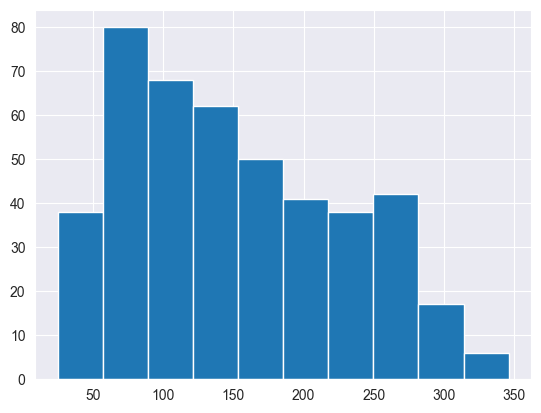

In [13]:
print("Distribution de notre target:")
df['target'].hist()

<h3> Analyses NA </h3>

In [41]:
print("------ Total de Na: ------") 
print(df.isna().sum())
print("------ Verif de Na: ------") 
print(df.isna().any())

------ Total de Na: ------
age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64
------ Verif de Na: ------
age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool


Pas de valeurs NA

<h3> Drops columns non nécéssaire </h3>

In [24]:
print(df['Unnamed: 0'], "La colonne Unnamed: 0 contient des valeurs type index et est donc redontante et non pertinentes, on peut le drop")
df.drop('Unnamed: 0', axis=1, inplace=True)

0        0
1        1
2        2
3        3
4        4
      ... 
437    437
438    438
439    439
440    440
441    441
Name: Unnamed: 0, Length: 442, dtype: int64 La colonne Unnamed: 0 contient des valeurs type index et est donc redontante et non pertinentes, on peut le drop


In [25]:
# On vérifie que ça a bien été retiré
df.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6',
       'target'],
      dtype='object')

In [26]:
df.isna().any()

age       False
sex       False
bmi       False
bp        False
s1        False
s2        False
s3        False
s4        False
s5        False
s6        False
target    False
dtype: bool

<h4>Nos données sont déja standardisé, il n'a pas de NA et les colonnes not nécéssaires on été retirer. On va maintenant passer à une analyse visuels de nos données </h4>

<a id="3"><h3> Graphique de distribution et pairplot </h3>
</a>

<a id="4"><h3> Correlation avec la target </h3>
</a>

<a id="5"><h3> Fréquences </h3>
</a>

<a id="6"><h3> Standardisation </h3>
</a>

<a id="7"><h3> Valeur manquante et gestion </h3>
</a>